In [261]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [262]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [263]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [265]:
df = pd.read_csv('mycleandata.csv', encoding='utf-8', index_col='Unnamed: 0')

In [266]:
df.columns

Index(['institution', 'zt_adoption', 'sda', 'sdwan', 'sddc', 'segmentation',
       'encryption', 'mfa', 'sso', 'policy_engine', 'mdm', 'dlp'],
      dtype='object')

In [267]:
# significance level
alpha = 0.05

# Calculation of Chisquare test statistics
chi_square = 0

In [268]:
df.corr()

,zt_adoption,encryption,mfa,sso,mdm
zt_adoption,1.000000,0.631454,0.516578,0.445736,0.422786
encryption,0.631454,1.000000,0.465225,0.358271,0.538962
mfa,0.516578,0.465225,1.000000,0.888346,0.445742
sso,0.445736,0.358271,0.888346,1.000000,0.343844
mdm,0.422786,0.538962,0.445742,0.343844,1.000000


In [269]:
df.describe()

,zt_adoption,encryption,mfa,sso,mdm
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2.950413,2.454545,1.809917,1.818182,2.520661
std,0.911512,0.966092,1.324853,1.372346,1.862342
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


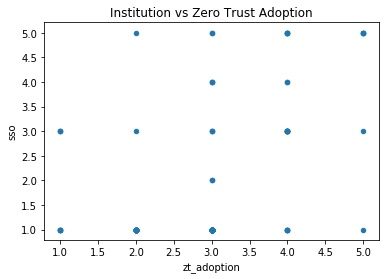

In [270]:
df.plot(kind='scatter', x='zt_adoption', y='sso', title='Institution vs Zero Trust Adoption');

In [ ]:
#https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm

In [272]:
inst = df['institution']

In [273]:
institution = df['institution'].dropna().unique().tolist()
institution

['Bank', 'SACCO', 'Insurance company']

<BarContainer object of 3 artists>

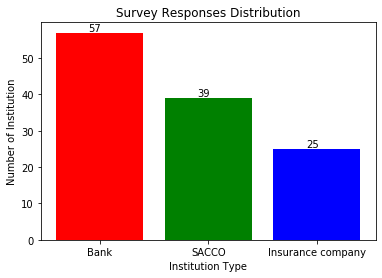

In [274]:
plt.xlabel("Institution Type")
plt.ylabel("Number of Institution")
institution_count = df['institution'].value_counts()
for i in range(len(institution)):
    plt.annotate(institution_count[i], (-0.1+i,institution_count[i]+0.5 ))
    
plt.title("Survey Responses Distribution")    
plt.bar(institution,(institution_count), color=['red', 'green', 'blue'])

                         Institution  count
Bank                            Bank     57
SACCO                          SACCO     39
Insurance company  Insurance company     25


Text(0.5, 1.0, 'Survey response distribution among financial institutions')

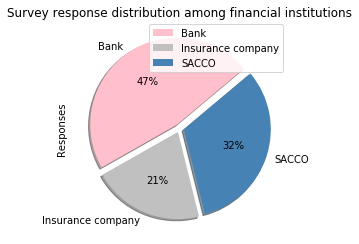

In [275]:
dframe = pd.DataFrame({'Institution':institution,
                          'Responses':institution_count})
print(dataframe)
# Defining colors for the pie chart
colors = ['pink', 'silver', 'steelblue']
# Plotting the pie chart for above dataframe
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)
dframe.groupby(['Institution']).sum().plot(kind='pie', y='Responses', autopct='%1.0f%%', colors=colors,explode=explode,shadow=True,startangle=40)
plt.title(label='Survey response distribution among financial institutions',fontweight=10, pad='2.0')


In [276]:
institution

['Bank', 'SACCO', 'Insurance company']

In [277]:
# Software defined access
sda_crosstab = pd.crosstab(index=df['institution'].rename('Institution'), columns=df['sda'].rename(''), )
sda_crosstab


,No,Yes
Institution,,
Bank,46,11
Insurance company,25,0
SACCO,36,3


In [278]:
# WAN
sdwan_crosstab = pd.crosstab(index=df['institution'].rename('Institution'), columns=df['sdwan'].rename('') )
sdwan_crosstab

,No,Yes
Institution,,
Bank,39,18
Insurance company,24,1
SACCO,36,3


In [279]:

sddc_crosstab = pd.crosstab(index=df['institution'].rename('Institution'), columns=df['sddc'].rename('') )
sddc_crosstab

,No,Yes
Institution,,
Bank,43,14
Insurance company,25,0
SACCO,35,4


[1, 2, 3, 4, 5] [41, 8, 3, 3, 2]


<BarContainer object of 5 artists>

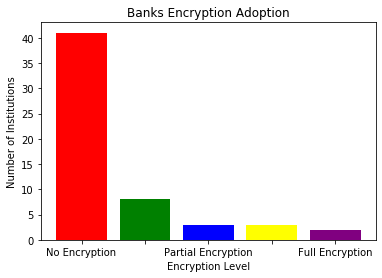

In [280]:
encryption = df[df['institution']=='Bank']['encryption'].dropna().unique().tolist()
encryption.sort(reverse=False)
encryption
encryption_level_count = df[df['institution']=='Bank']['encryption'].value_counts().tolist()
encryption_level_count

print(encryption,encryption_level_count )
values=['No Encryption', '','Partial Encryption', '','Full Encryption']
plt.xlabel("Encryption Level")
plt.ylabel("Number of Institutions")
plt.title("Banks Encryption Adoption")
plt.xticks(encryption,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(encryption,(encryption_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])


[1, 2, 3, 4, 5] [18, 15, 4, 1, 1]


<BarContainer object of 5 artists>

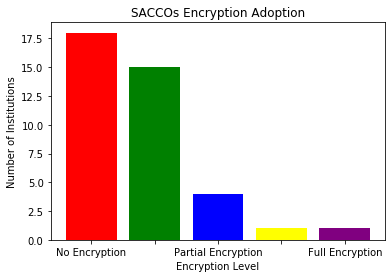

In [281]:
encryption = df[df['institution']=='SACCO']['encryption'].dropna().unique().tolist()
encryption.sort(reverse=False)
encryption_level_count = df[df['institution']=='SACCO']['encryption'].value_counts().tolist()
encryption_level_count

print(encryption,encryption_level_count )
values=['No Encryption', '','Partial Encryption', '','Full Encryption']
plt.xlabel("Encryption Level")
plt.ylabel("Number of Institutions")
plt.title("SACCOs Encryption Adoption")
plt.xticks(encryption,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(encryption,(encryption_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])


[1, 2, 3, 4, 5] [18, 7, 0, 0, 0]


<BarContainer object of 5 artists>

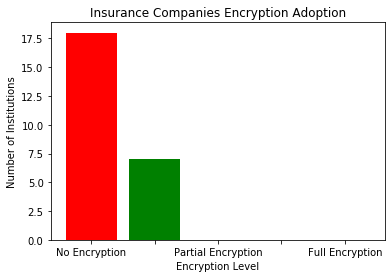

In [282]:
encryption = df[df['institution']=='Insurance company']['encryption'].dropna().unique().tolist()
encryption.sort(reverse=False)
encryption.append(1)
encryption.append(4)
encryption.append(5)
encryption.sort(reverse=False)
encryption_level_count = df[df['institution']=='Insurance company']['encryption'].value_counts().tolist()
encryption_level_count.append(0)
encryption_level_count.append(0)
encryption_level_count.append(0)
print(encryption,encryption_level_count )
values=['No Encryption', '','Partial Encryption', '','Full Encryption']
plt.xlabel("Encryption Level")
plt.ylabel("Number of Institutions")
plt.title("Insurance Companies Encryption Adoption")
plt.xticks(encryption,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(encryption,(encryption_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

[1, 2, 3, 4, 5]
             sda
zt_adoption     
1              2
2              0
3              5
4              2
5              5              sda
zt_adoption     
1              6
2             23
3             58
4             19
5              1


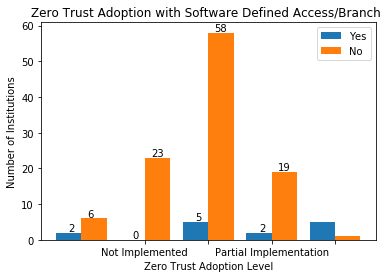

[2, 0, 5, 2, 5]
[6, 23, 58, 19, 1]


In [283]:
zt_adoption = df['zt_adoption'].dropna().unique().tolist()
zt_adoption.sort(reverse=False)
zt_adoption
print (zt_adoption)
sda_yes_count = df.groupby(['zt_adoption']).agg({'sda': lambda x: len([j for j in list(x) if "Yes" in j])})
sda_no_count = df.groupby(['zt_adoption']).agg({'sda': lambda x: len([j for j in list(x) if "No" in j])})

print(sda_yes_count,sda_no_count)
X_axis = np.arange(len(zt_adoption))
for i in range(1,len(zt_adoption)):
    plt.annotate(sda_yes_count['sda'][i], (-1.2+i,sda_yes_count['sda'][i]+0.4 ))
    plt.annotate(sda_no_count['sda'][i], (-0.9+i,sda_no_count['sda'][i]+0.4 ))


values=['Not Implemented','','Partial Implementation','','Full Implementation']
plt.xlabel("Zero Trust Adoption Level")
plt.ylabel("Number of Institutions")
plt.title("Zero Trust Adoption with Software Defined Access/Branch ")
plt.xticks(zt_adoption, values)
plt.bar(X_axis - 0.2, list(sda_yes_count['sda']), 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, list(sda_no_count['sda']), 0.4, label = 'No')
plt.legend()
plt.show()

print(list(sda_yes_count['sda']))
print(list(sda_no_count['sda']))

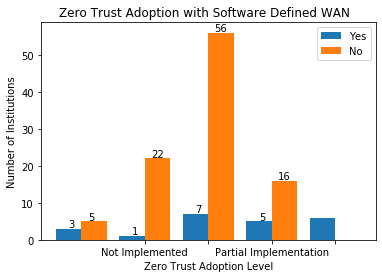

[5, 22, 56, 16, 0]
[3, 1, 7, 5, 6]


In [284]:
zt_adoption = df['zt_adoption'].dropna().unique().tolist()
zt_adoption.sort(reverse=False)
zt_adoption

sdwan_yes_count = df.groupby(['zt_adoption']).agg({'sdwan': lambda x: len([j for j in list(x) if "Yes" == j])})
sdwan_no_count = df.groupby(['zt_adoption']).agg({'sdwan': lambda x: len([j for j in list(x) if "No" == j])})

X_axis = np.arange(len(zt_adoption))
for i in range(1,len(zt_adoption)):
    plt.annotate(sdwan_yes_count['sdwan'][i], (-1.2+i,sdwan_yes_count['sdwan'][i]+0.4 ))
    plt.annotate(sdwan_no_count['sdwan'][i], (-0.9+i,sdwan_no_count['sdwan'][i]+0.4 ))
# print(sda_yes_count,sda_no_count)
X_axis = np.arange(len(zt_adoption))
values=['Not Implemented','','Partial Implementation','','Full Implementation']
plt.xlabel("Zero Trust Adoption Level")
plt.ylabel("Number of Institutions")
plt.title("Zero Trust Adoption with Software Defined WAN  ")
plt.xticks(zt_adoption, values)
plt.bar(X_axis - 0.2, list([int(i) for i in sdwan_yes_count['sdwan']]), 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, list([int(i) for i in sdwan_no_count['sdwan']]), 0.4, label = 'No')
plt.legend()
plt.show()
#plt.bar(encryption,(sda_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

print(list(sdwan_no_count['sdwan']))
print(list(sdwan_yes_count['sdwan']))

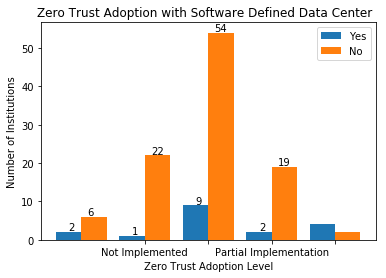

[6, 22, 54, 19, 2]
[2, 1, 9, 2, 4]


In [285]:
zt_adoption = df['zt_adoption'].dropna().unique().tolist()
zt_adoption.sort(reverse=False)
zt_adoption

sddc_yes_count = df.groupby(['zt_adoption']).agg({'sddc': lambda x: len([j for j in list(x) if "Yes" == j])})
sddc_no_count = df.groupby(['zt_adoption']).agg({'sddc': lambda x: len([j for j in list(x) if "No" == j])})
for i in range(1,len(zt_adoption)):
    plt.annotate(sddc_yes_count['sddc'][i], (-1.2+i,sddc_yes_count['sddc'][i]+0.4 ))
    plt.annotate(sddc_no_count['sddc'][i], (-0.9+i,sddc_no_count['sddc'][i]+0.4 ))
# print(sda_yes_count,sda_no_count)
X_axis = np.arange(len(zt_adoption))
#values=['', '2','Partial', '4','Full']
values=['Not Implemented','','Partial Implementation','','Full Implementation']
plt.xlabel("Zero Trust Adoption Level")
plt.ylabel("Number of Institutions")
plt.title("Zero Trust Adoption with Software Defined Data Center  ")
plt.xticks(zt_adoption, values)
plt.bar(X_axis - 0.2, list([int(i) for i in sddc_yes_count['sddc']]), 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, list([int(i) for i in sddc_no_count['sddc']]), 0.4, label = 'No')
plt.legend()
plt.show()
#plt.bar(encryption,(sda_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

print(list(sddc_no_count['sddc']))
print(list(sddc_yes_count['sddc']))

institution
Bank                 47
Insurance company    25
SACCO                37
Name: segmentation, dtype: int64
                         Institution  Segmentation_Yes_Responses
institution                                                     
Bank                            Bank                          47
Insurance company              SACCO                          25
SACCO              Insurance company                          37


Text(0.5, 1.0, 'Percentage of institutions implementing network segmentation')

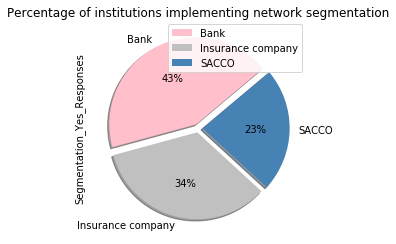

In [286]:
segmentation_yes_count = df.groupby(['institution']).agg({'segmentation': lambda x: len([j for j in list(x) if "Yes" == j])})
print (segmentation_yes_count['segmentation'])
dframe = pd.DataFrame({'Institution':institution,'Segmentation_Yes_Responses':segmentation_yes_count['segmentation']})
print(dframe)
# Defining colors for the pie chart
colors = ['pink', 'silver', 'steelblue']
# Plotting the pie chart for above dataframe
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

dframe.groupby(['Institution']).sum().plot(kind='pie', y='Segmentation_Yes_Responses', autopct='%1.0f%%', colors=colors,explode=explode,shadow=True,startangle=40)  
plt.title(label='Percentage of institutions implementing network segmentation',fontweight=10, pad='2.0')

institution
Bank                 47
Insurance company    25
SACCO                19
Name: policy_engine, dtype: int64
                         Institution  Policy_Engine_Use
institution                                            
Bank                            Bank                 47
Insurance company              SACCO                 25
SACCO              Insurance company                 19


Text(0.5, 1.0, 'Percentage of institutions using a security engine use for access control')

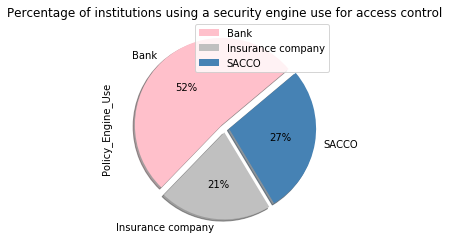

In [287]:
policy_engine_yes_count = df.groupby(['institution']).agg({'policy_engine': lambda x: len([j for j in list(x) if "Yes" == j])})
print (policy_engine_yes_count['policy_engine'])
dframe = pd.DataFrame({'Institution':institution,'Policy_Engine_Use':policy_engine_yes_count['policy_engine']})
print(dframe)
# Defining colors for the pie chart
colors = ['pink', 'silver', 'steelblue']
# Plotting the pie chart for above dataframe
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

dframe.groupby(['Institution']).sum().plot(kind='pie', y='Policy_Engine_Use', autopct='%1.0f%%', colors=colors,explode=explode,shadow=True,startangle=40)  
plt.title(label='Percentage of institutions using a security engine use for access control',fontweight=10, pad='2.0')

[1, 2, 3, 4, 5] [37, 15, 3, 1, 1]


<BarContainer object of 5 artists>

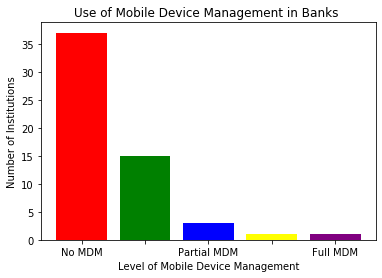

In [288]:
mdm = df[df['institution']=='Bank']['mdm'].dropna().unique().tolist()
mdm.sort(reverse=False)
mdm
mdm_level_count = df[df['institution']=='Bank']['mdm'].value_counts().tolist()
mdm_level_count

print(mdm,mdm_level_count )
values=['No MDM', '','Partial MDM', '','Full MDM']
plt.xlabel("Level of Mobile Device Management")
plt.ylabel("Number of Institutions")
plt.title("Use of Mobile Device Management in Banks ")
plt.xticks(mdm,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(mdm,(mdm_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

[1, 2, 3, 4, 5] [33, 0, 3, 2, 1]


<BarContainer object of 5 artists>

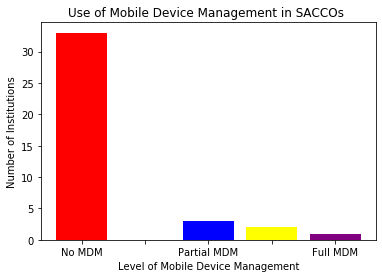

In [289]:
mdm = df[df['institution']=='SACCO']['mdm'].dropna().unique().tolist()
mdm.append(2)
mdm.sort(reverse=False)

mdm_level_count = df[df['institution']=='SACCO']['mdm'].value_counts().tolist()
mdm_level_count.insert(1,0)

print(mdm,mdm_level_count )
values=['No MDM', '','Partial MDM', '','Full MDM']
plt.xlabel("Level of Mobile Device Management")
plt.ylabel("Number of Institutions")
plt.title("Use of Mobile Device Management in SACCOs ")
plt.xticks(mdm,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(mdm,(mdm_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])


[1, 2, 3, 4, 5] [22, 0, 1, 1, 1]


<BarContainer object of 5 artists>

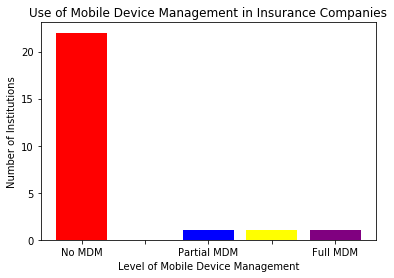

In [290]:
mdm = df[df['institution']=='Insurance company']['mdm'].dropna().unique().tolist()
mdm.append(2)
mdm.sort(reverse=False)
mdm
mdm_level_count = df[df['institution']=='Insurance company']['mdm'].value_counts().tolist()
mdm_level_count.insert(1,0)

print(mdm,mdm_level_count )
values=['No MDM', '','Partial MDM', '','Full MDM']
plt.xlabel("Level of Mobile Device Management")
plt.ylabel("Number of Institutions")
plt.title("Use of Mobile Device Management in Insurance Companies")
plt.xticks(mdm,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(mdm,(mdm_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

institution
Bank                 42
Insurance company     2
SACCO                 6
Name: dlp, dtype: int64
                         Institution  DLP
institution                              
Bank                            Bank   42
Insurance company              SACCO    2
SACCO              Insurance company    6


Text(0.5, 1.0, 'Percentage of institutions enforcing Data Loss Prevention')

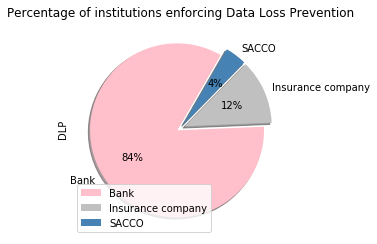

In [292]:
dlp_yes_count = df.groupby(['institution']).agg({'dlp': lambda x: len([j for j in list(x) if "Yes" == j])})
print (dlp_yes_count['dlp'])
dframe = pd.DataFrame({'Institution':institution,'DLP':dlp_yes_count['dlp']})
print(dframe)
# Defining colors for the pie chart
colors = ['pink', 'silver', 'steelblue']
# Plotting the pie chart for above dataframe
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

dframe.groupby(['Institution']).sum().plot(kind='pie', y='DLP', autopct='%1.0f%%', colors=colors,explode=explode,shadow=True,startangle=60)  
plt.title(label='Percentage of institutions enforcing Data Loss Prevention',fontweight=10, pad='2.0')